In [1]:
pip install geopy plotly

In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data loading

### Subtask:
Load the sales data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the sales data into a pandas DataFrame and display its first few rows and shape.



In [3]:


try:
    sales_df = pd.read_csv('Sales Data - sales_data_sample.csv')
    display(sales_df.head())
    print(sales_df.shape)
except FileNotFoundError:
    print("Error: 'Sales Data - sales_data_sample.csv' not found.")
    sales_df = None
except pd.errors.ParserError:
    try:
        sales_df = pd.read_csv('Sales Data - sales_data_sample.csv', encoding='latin-1')
        display(sales_df.head())
        print(sales_df.shape)
    except:
        print("Error: Unable to parse the CSV file with default or latin-1 encoding.")
        sales_df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    sales_df = None

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


(2824, 10)


## Data exploration

### Subtask:
Explore the loaded sales data to understand its structure, identify potential issues, and gain initial insights.


**Reasoning**:
I need to explore the sales data by checking its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.  I'll also examine the first and last few rows and check for inconsistencies in the `Order Date` column.



In [4]:
print("Data Types:", sales_df.dtypes)

Data Types: ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERDATE           object
STATUS              object
PRODUCTLINE         object
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
DEALSIZE            object
dtype: object


In [5]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", sales_df.shape)

sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])
print("Data Types:", sales_df.dtypes)

Shape of the DataFrame: (2824, 10)
Data Types: ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERDATE          datetime64[ns]
STATUS                     object
PRODUCTLINE                object
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
DEALSIZE                   object
dtype: object


**Reasoning**:
I need to analyze the `STATUS` column more closely to look for potential errors.  I'll also look for any unusual values in numerical columns such as `QUANTITYORDERED` and `PRICEEACH`.



In [6]:
# Analyze the 'STATUS' column for potential errors
status_counts = sales_df['STATUS'].value_counts()
print("\nStatus Counts:\n", status_counts)

# Investigate unusual values in numerical columns
print("\nValues of 'QUANTITYORDERED' less than 0:\n", sales_df[sales_df['QUANTITYORDERED'] < 0])
print("\nValues of 'PRICEEACH' less than 0:\n", sales_df[sales_df['PRICEEACH'] < 0])


Status Counts:
 STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

Values of 'QUANTITYORDERED' less than 0:
 Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERDATE, STATUS, PRODUCTLINE, PRODUCTCODE, CUSTOMERNAME, CITY, DEALSIZE]
Index: []

Values of 'PRICEEACH' less than 0:
 Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERDATE, STATUS, PRODUCTLINE, PRODUCTCODE, CUSTOMERNAME, CITY, DEALSIZE]
Index: []


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [8]:
# Cek nilai unik di kolom kategorikal
print("Nilai unik di kolom STATUS:")
print(sales_df['STATUS'].unique())

print("\nNilai unik di kolom PRODUCTLINE:")
print(sales_df['PRODUCTLINE'].unique())

print("\nNilai unik di kolom DEALSIZE:")
print(sales_df['DEALSIZE'].unique())

print("Nilai unik di kolom STATUS:")
print(sales_df['CITY'].unique())

Nilai unik di kolom STATUS:
['Shipped' 'Resolved' 'Cancelled' 'On Hold' 'Disputed' 'In Process']

Nilai unik di kolom PRODUCTLINE:
['Vintage Cars' 'Classic Cars' 'Trucks and Buses' 'Trains' 'Ships'
 'Planes' 'Motorcycles']

Nilai unik di kolom DEALSIZE:
['Medium' 'Small' 'Large']
Nilai unik di kolom STATUS:
['Nashua' 'Frankfurt' 'NYC' 'Stavern' 'Madrid' 'Kobenhavn' 'Bergamo'
 'Makati City' 'Philadelphia' 'Manchester' 'San Francisco' 'Lule'
 'San Rafael' 'Paris' 'Charleroi' 'Singapore' 'Barcelona' 'Salzburg'
 'Melbourne' 'Reims' 'Marseille' 'Nantes' 'Las Vegas' 'London'
 'Brickhaven' 'Glendale' 'Toulouse' 'Chatswood' 'Burlingame' 'Espoo'
 'New Bedford' 'Pasadena' 'North Sydney' 'Brisbane' 'Oulu'
 'South Brisbane' 'Helsinki' 'Los Angeles' 'Aaarhus' 'Graz' 'Boras'
 'Montreal' 'Bridgewater' 'Reggio Emilia' 'Lille' 'Bergen' 'Sevilla'
 'Koln' 'Glen Waverly' 'Lyon' 'White Plains' 'New Haven' 'Burbank'
 'Vancouver' 'Boston' 'Osaka' 'Versailles' 'Dublin' 'Bruxelles'
 'San Diego' 'Gensve' 'Cambr

## Data cleaning

### Subtask:
Clean the sales data by handling inconsistencies and potential errors found during the data exploration phase.  Focus on data type conversions and any identified inconsistencies.

In [9]:
sales_df.duplicated().sum()

1

In [10]:
# Hapus duplikat berdasarkan semua kolom
sales = sales_df.drop_duplicates()
sales.duplicated().sum()

0

In [11]:
# Hitung IQR untuk QUANTITYORDERED
Q1_quantity = sales['QUANTITYORDERED'].quantile(0.25)
Q3_quantity = sales['QUANTITYORDERED'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Tentukan batas outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Filter outliers
outliers_quantity = sales[(sales['QUANTITYORDERED'] < lower_bound_quantity) | (sales['QUANTITYORDERED'] > upper_bound_quantity)]
print("\nOutliers in 'QUANTITYORDERED':\n", outliers_quantity)

# Hitung IQR untuk PRICEEACH
Q1_price = sales['PRICEEACH'].quantile(0.25)
Q3_price = sales['PRICEEACH'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Tentukan batas outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter outliers
outliers_price = sales[(sales['PRICEEACH'] < lower_bound_price) | (sales['PRICEEACH'] > upper_bound_price)]
print("\nOutliers in 'PRICEEACH':\n", outliers_price)


Outliers in 'QUANTITYORDERED':
       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERDATE   STATUS  \
2665        10401               85      88.75 2005-04-03  On Hold   
2667        10401               77      92.00 2005-04-03  On Hold   
2681        10405               97      93.28 2005-04-14  Shipped   
2685        10405               76     100.00 2005-04-14  Shipped   
2690        10407               76     100.00 2005-04-22  On Hold   
2697        10407               76      94.50 2005-04-22  On Hold   
2719        10412               70     100.00 2005-05-03  Shipped   
2782        10419               70     100.00 2005-05-17  Shipped   

           PRODUCTLINE PRODUCTCODE               CUSTOMERNAME        CITY  \
2665            Planes   S700_2466    Tekni Collectables Inc.      Newark   
2667            Planes   S700_3167    Tekni Collectables Inc.      Newark   
2681      Classic Cars    S12_4675                Mini Caravy  Strasbourg   
2685      Classic Cars    S24_3856   

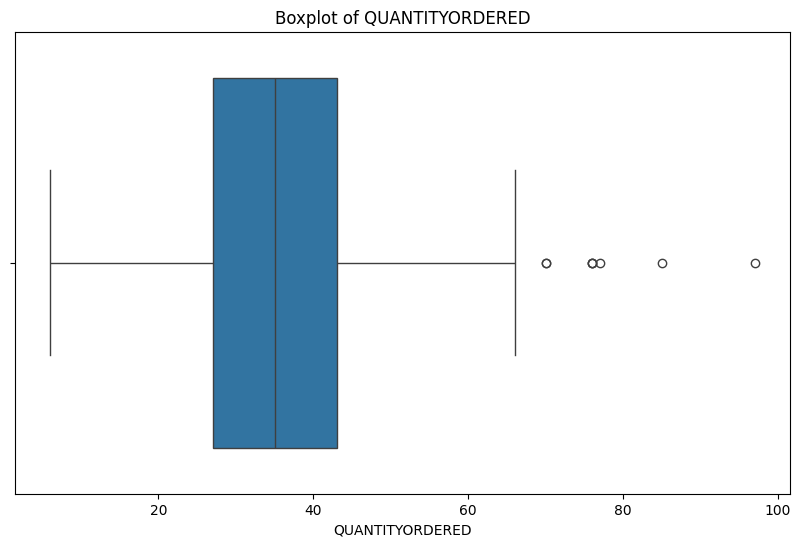

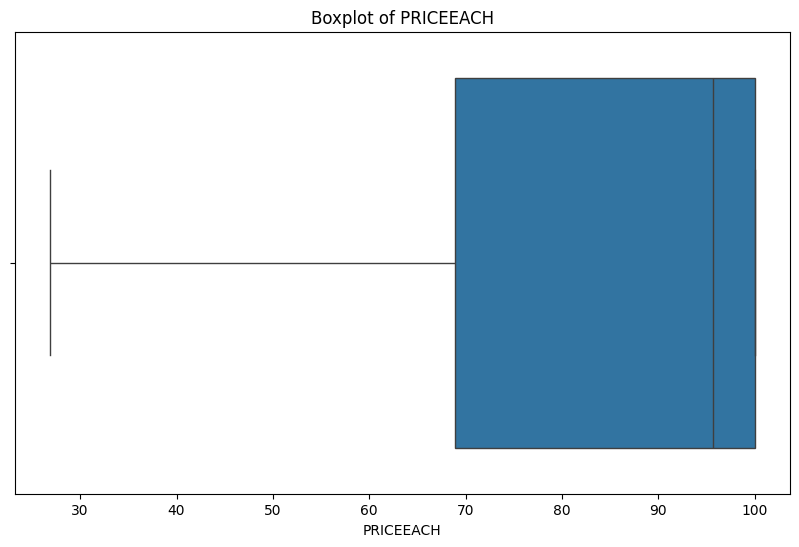

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk QUANTITYORDERED
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['QUANTITYORDERED'])
plt.title('Boxplot of QUANTITYORDERED')
plt.show()

# Boxplot untuk PRICEEACH
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['PRICEEACH'])
plt.title('Boxplot of PRICEEACH')
plt.show()

## Data analysis


**Reasoning**:
The visualizations need to be generated based on the analysis performed in the previous step. The code will generate the plots as instructed.



In [13]:
import matplotlib.ticker as ticmmker
from matplotlib.ticker import FuncFormatter

In [14]:
# Fungsi untuk memformat nilai ke dolar
def format_dollar(x, pos):
    return f"${x:,.0f}"

# Membuat formatter
dollar_formatter = FuncFormatter(format_dollar)

<ipython-input-15-4ab282f6f50a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['SALES'] = sales['QUANTITYORDERED'] * sales['PRICEEACH']
<ipython-input-15-4ab282f6f50a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])
<ipython-input-15-4ab282f6f50a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

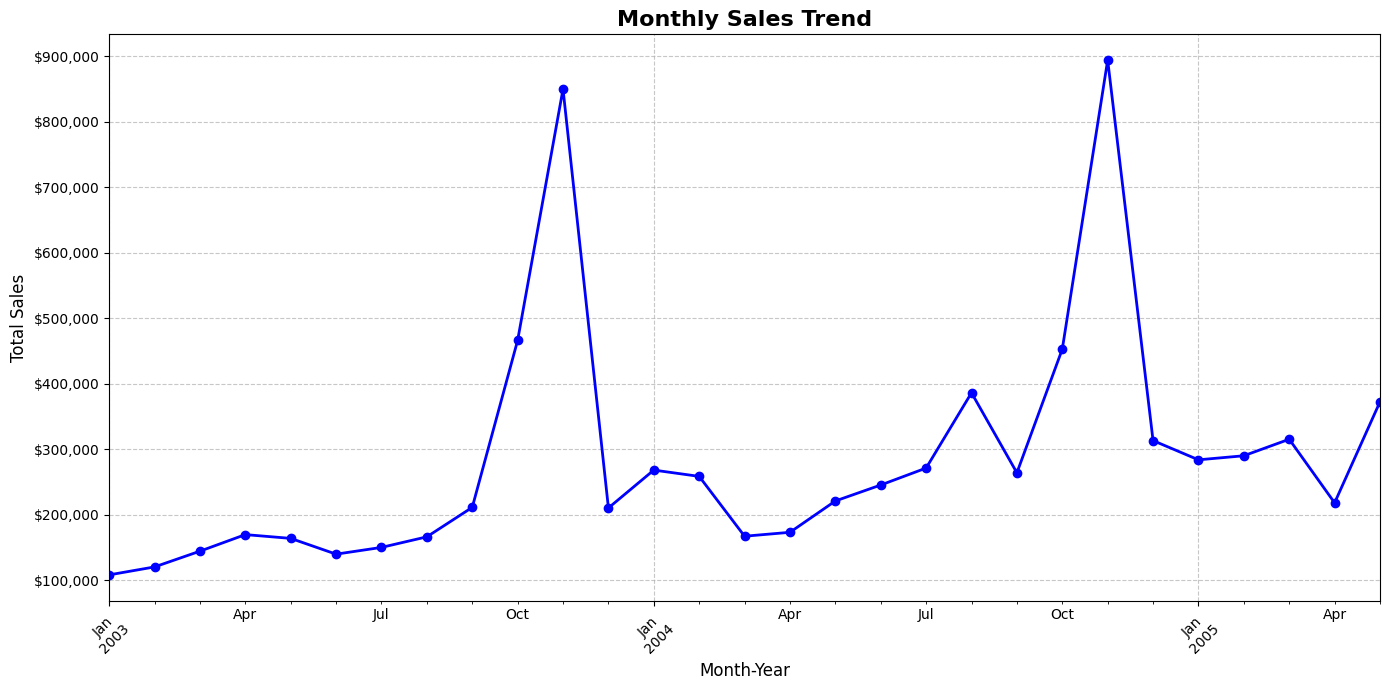

In [15]:
# Calculate the 'SALES' column
sales['SALES'] = sales['QUANTITYORDERED'] * sales['PRICEEACH']

# Sales Trends Over Time
# --- Redefine 'monthly_sales' to fix the NameError ---
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])
sales['MONTH_YEAR'] = sales['ORDERDATE'].dt.to_period('M')
monthly_sales = sales.groupby('MONTH_YEAR')['SALES'].sum()
# --- End of fix ---

plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.gca().yaxis.set_major_formatter(dollar_formatter)  # Format sumbu y ke dolar
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-16-fcbb3dd5dcec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productline_sales.index, y=productline_sales.values, palette='viridis')


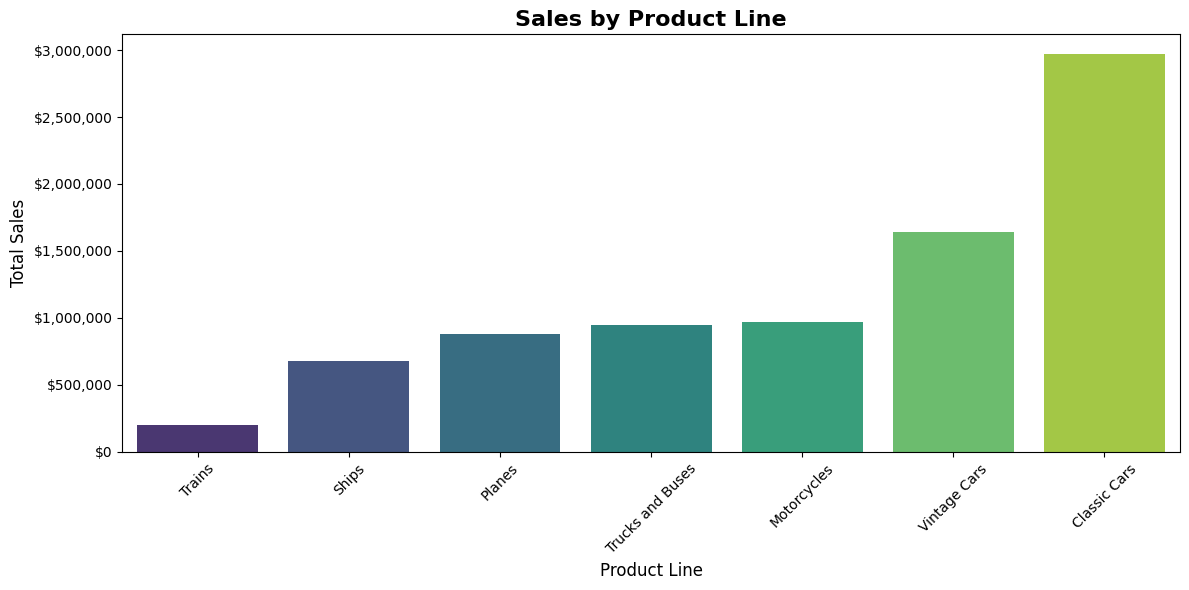

In [16]:
# Sales by Product Line
# --- Calculate productline_sales before plotting ---
productline_sales = sales.groupby('PRODUCTLINE')['SALES'].sum()

# Urutkan dari yang terkecil ke terbesar
productline_sales = productline_sales.sort_values(ascending=True)
# --- End of fix ---

plt.figure(figsize=(12, 6))
sns.barplot(x=productline_sales.index, y=productline_sales.values, palette='viridis')
plt.title('Sales by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.gca().yaxis.set_major_formatter(dollar_formatter)  # Format sumbu y ke dolar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

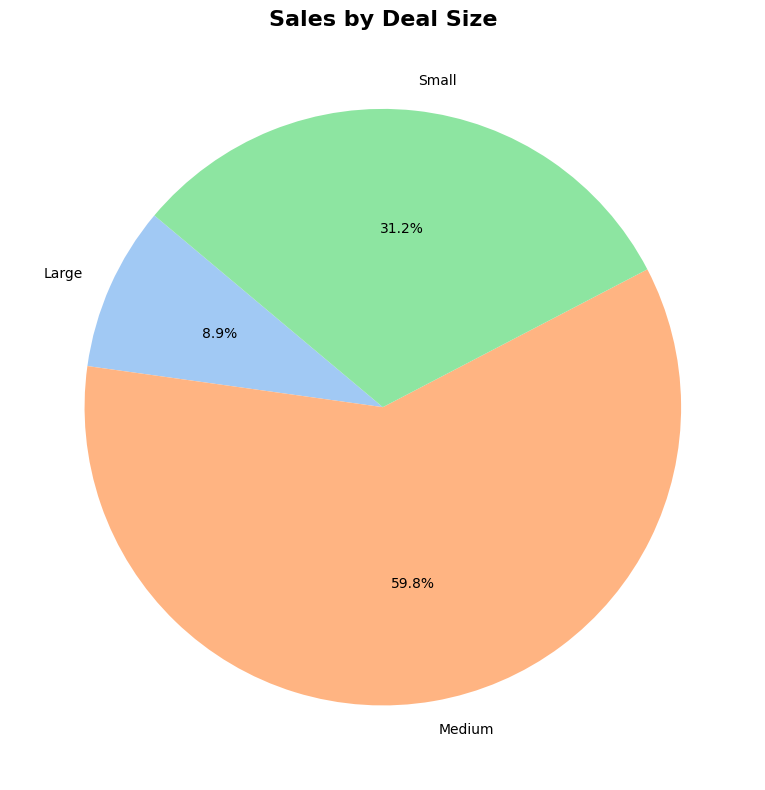

In [17]:
# Sales by Deal Size
dealsize_sales = sales.groupby('DEALSIZE')['SALES'].sum() # Define dealsize_sales here
plt.figure(figsize=(8, 8))
plt.pie(dealsize_sales, labels=dealsize_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel")) # Use a color palette from seaborn
plt.title('Sales by Deal Size', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-18-83d352a9313b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.head(10).index, y=city_sales.head(10).values, palette='magma')


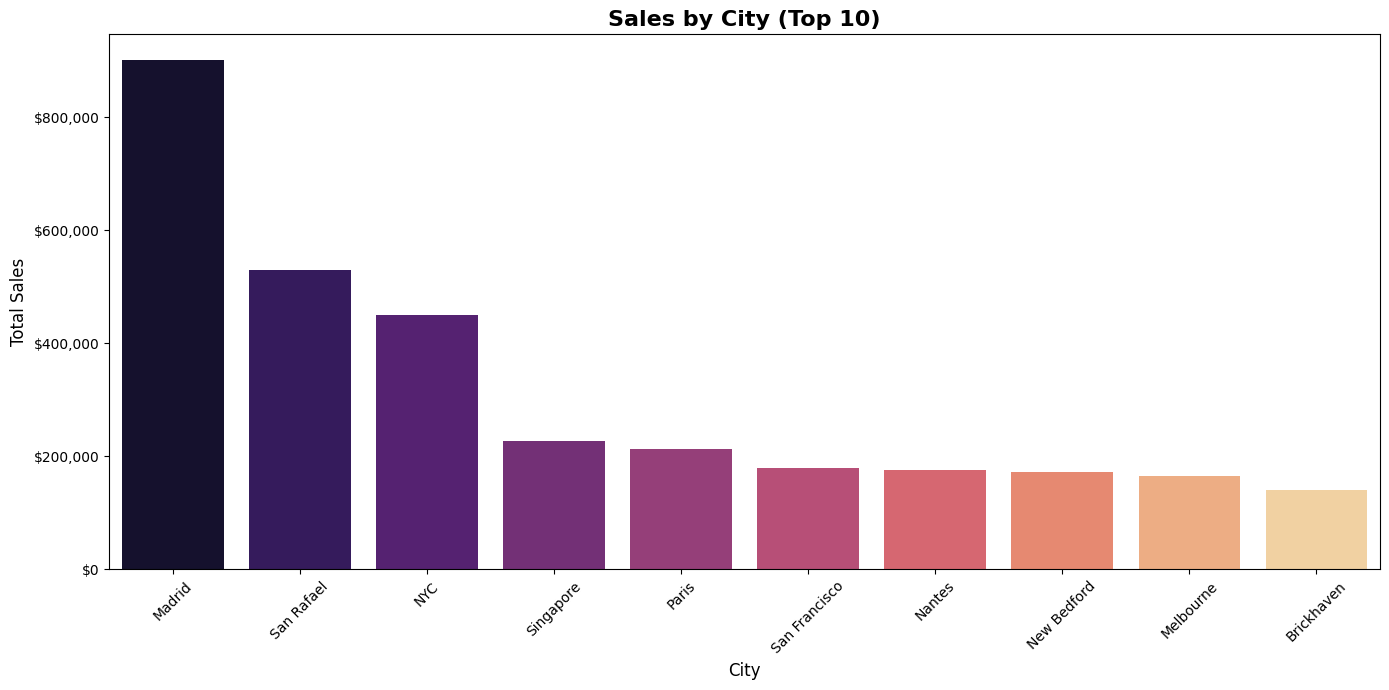

In [18]:
# Sales by Region (City)
# --- Define city_sales before plotting ---
city_sales = sales.groupby('CITY')['SALES'].sum().sort_values(ascending=False)
# --- End of fix ---

plt.figure(figsize=(14, 7))
sns.barplot(x=city_sales.head(10).index, y=city_sales.head(10).values, palette='magma')
plt.title('Sales by City (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.gca().yaxis.set_major_formatter(dollar_formatter)  # Format sumbu y ke dolar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Data koordinat manual
manual_coords = {
    'Nashua, USA': (42.765366, -71.467566),
    'Frankfurt, Germany': (50.110924, 8.682127),
    'NYC, USA': (40.712776, -74.005974),
    'Stavern, Norway': (59.000000, 10.033333),
    'Madrid, Spain': (40.416775, -3.703790),
    'Kobenhavn, Denmark': (55.676098, 12.568337),
    'Bergamo, Italy': (45.698264, 9.677270),
    'Makati City, Philippines': (14.554729, 121.024445),
    'Philadelphia, USA': (39.952583, -75.165222),
    'Manchester, UK': (53.480759, -2.242631),
    'San Francisco, USA': (37.774929, -122.419416),
    'Lule, Sweden': (65.584819, 22.156704),
    'San Rafael, USA': (37.973535, -122.531087),
    'Paris, France': (48.856613, 2.352222),
    'Charleroi, Belgium': (50.410809, 4.444643),
    'Singapore, Singapore': (1.352083, 103.819836),
    'Barcelona, Spain': (41.385064, 2.173404),
    'Salzburg, Austria': (47.809490, 13.055010),
    'Melbourne, Australia': (-37.813628, 144.963058),
    'Reims, France': (49.258329, 4.031696),
    'Marseille, France': (43.296482, 5.369780),
    'Nantes, France': (47.218371, -1.553621),
    'Las Vegas, USA': (36.169941, -115.139830),
    'London, UK': (51.507351, -0.127758),
    'Brickhaven, USA': (42.108414, -70.945786),
    'Glendale, USA': (34.142508, -118.255075),
    'Toulouse, France': (43.604652, 1.444209),
    'Chatswood, Australia': (-33.796669, 151.180405),
    'Burlingame, USA': (37.584103, -122.366082),
    'Espoo, Finland': (60.205491, 24.655900),
    'New Bedford, USA': (41.636215, -70.934205),
    'Pasadena, USA': (34.147785, -118.144516),
    'North Sydney, Australia': (-33.840556, 151.207222),
    'Brisbane, Australia': (-27.469771, 153.025124),
    'Oulu, Finland': (65.012089, 25.465077),
    'South Brisbane, Australia': (-27.480991, 153.012156),
    'Helsinki, Finland': (60.169856, 24.938379),
    'Los Angeles, USA': (34.052234, -118.243685),
    'Aaarhus, Denmark': (56.162939, 10.203921),
    'Graz, Austria': (47.070714, 15.439504),
    'Boras, Sweden': (57.721035, 12.939819),
    'Montreal, Canada': (45.501689, -73.567256),
    'Bridgewater, USA': (41.990373, -70.975143),
    'Reggio Emilia, Italy': (44.698993, 10.629686),
    'Lille, France': (50.629250, 3.057256),
    'Bergen, Norway': (60.391263, 5.322054),
    'Sevilla, Spain': (37.389092, -5.984459),
    'Koln, Germany': (50.937531, 6.960279),
    'Glen Waverly, Australia': (-37.878540, 145.164810),
    'Lyon, France': (45.764043, 4.835659),
    'White Plains, USA': (41.033986, -73.762910),
    'New Haven, USA': (41.308274, -72.927884),
    'Burbank, USA': (34.180839, -118.308966),
    'Vancouver, Canada': (49.282729, -123.120738),
    'Boston, USA': (42.360082, -71.058880),
    'Osaka, Japan': (34.693738, 135.502165),
    'Versailles, France': (48.801408, 2.130122),
    'Dublin, Ireland': (53.349805, -6.260310),
    'Bruxelles, Belgium': (50.850346, 4.351721),
    'San Diego, USA': (32.715738, -117.161084),
    'Gensve, Switzerland': (46.204391, 6.143158),
    'Cambridge, UK': (52.205337, 0.121817),
    'Cowes, UK': (50.763279, -1.300670),
    'Newark, USA': (40.735657, -74.172367),
    'Tsawassen, Canada': (49.016364, -123.083774),
    'Strasbourg, France': (48.573405, 7.752111),
    'San Jose, USA': (37.338208, -121.886329),
    'Liverpool, UK': (53.408371, -2.991573),
    'Minato-ku, Japan': (35.658034, 139.751636),
    'Allentown, USA': (40.608430, -75.490183),
    'Torino, Italy': (45.070312, 7.686857),
    'Oslo, Norway': (59.913869, 10.752245),
    'Munich, Germany': (48.135125, 11.581981)
}

# Fungsi untuk mendapatkan latitude dan longitude dengan data manual
def get_lat_lon(city):
    if city in manual_coords:
        return manual_coords[city]
    else:
        try:
            location = geocode(city)
            return location.latitude, location.longitude
        except:
            return None, None

# Tambahkan kolom latitude dan longitude
sales_df[['LAT', 'LON']] = sales_df['CITY'].apply(lambda x: pd.Series(get_lat_lon(x)))

# Tampilkan DataFrame
print(sales_df)

                  CITY        LAT         LON
0          Nashua, USA  42.765366  -71.467566
1   Frankfurt, Germany  50.110924    8.682127
2             NYC, USA  40.712776  -74.005974
3      Stavern, Norway  59.000000   10.033333
4        Madrid, Spain  40.416775   -3.703790
..                 ...        ...         ...
68    Minato-ku, Japan  35.658034  139.751636
69      Allentown, USA  40.608430  -75.490183
70       Torino, Italy  45.070312    7.686857
71        Oslo, Norway  59.913869   10.752245
72     Munich, Germany  48.135125   11.581981

[73 rows x 3 columns]


In [23]:
import plotly.express as px

# Contoh data penjualan (random)
import numpy as np
sales_df['SALES'] = np.random.randint(100000, 1000000, size=len(sales_df))

# Buat peta
fig = px.scatter_geo(sales_df,
                     lat='LAT',
                     lon='LON',
                     size='SALES',  # Ukuran titik berdasarkan penjualan
                     color='SALES',  # Warna titik berdasarkan penjualan
                     hover_name='CITY',  # Nama kota yang muncul saat hover
                     scope='world',  # Fokus pada peta global
                     title='Sales by City (Darker Color Indicates Higher Sales)',
                     color_continuous_scale='Viridis')  # Skala warna

# Tampilkan peta
fig.show()

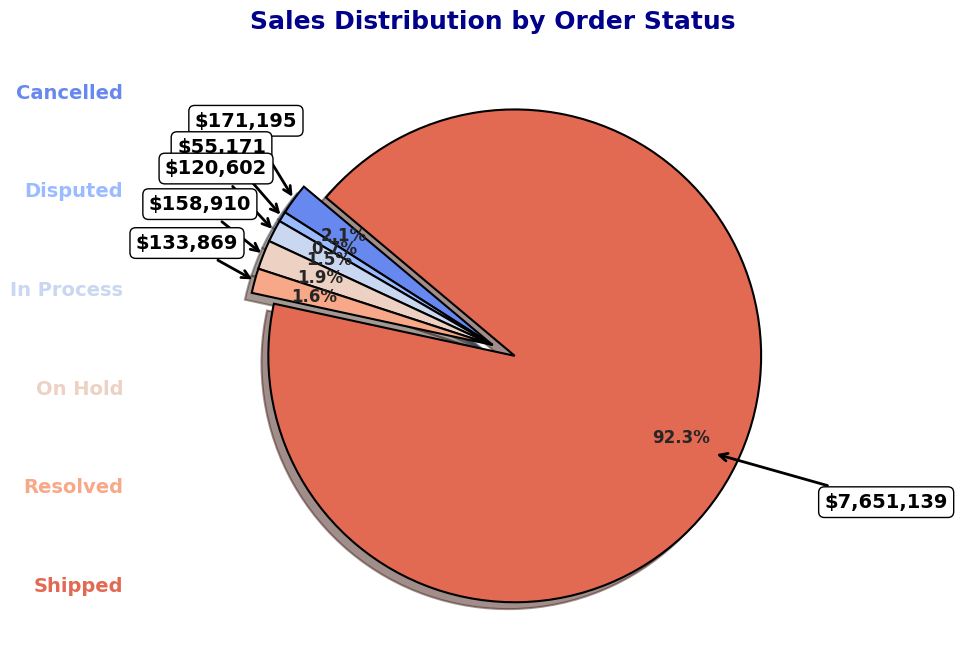

In [40]:
# Mengelompokkan total sales berdasarkan status pesanan
status_sales = sales.groupby('STATUS')['SALES'].sum()

# Warna menggunakan palet dari seaborn
colors = sns.color_palette("coolwarm", len(status_sales))

# Membuat efek explode untuk kategori terbesar
explode = [0.1 if value == max(status_sales.values) else 0 for value in status_sales.values]

# Fungsi untuk menampilkan format dolar pada panah keluar
def format_currency(value):
    return f"${value:,.0f}"

# Membuat figure
fig, ax = plt.subplots(figsize=(10, 8))

# Membuat pie chart tanpa label status dan dengan ukuran persentase lebih kecil
wedges, _, autotexts = ax.pie(
    status_sales,
    labels=None,  # Status tidak di dalam pie
    autopct='%.1f%%',  # Persentase dengan satu angka desimal
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Menebalkan garis tepi
    pctdistance=0.75,  # Memposisikan persentase lebih dekat ke tepi pie
    textprops={'fontsize': 12, 'fontweight': 'bold'}  # Membuat persentase lebih kecil tapi tetap jelas
)

# Menampilkan status di sebelah kiri
x_text_left = -1.5  # Posisi teks di sebelah kiri pie
y_positions = np.linspace(1, -1, len(status_sales))  # Menyesuaikan posisi vertikal

for y, (status, color) in zip(y_positions, zip(status_sales.index, colors)):
    ax.text(x_text_left, y, status, fontsize=14, fontweight='bold', color=color, ha='right')

# Menambahkan jumlah dolar di luar dengan panah keluar ke kanan
for i, value in enumerate(status_sales.values):
    # Menghitung sudut tengah setiap wedge
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    x = wedges[i].r * np.cos(np.deg2rad(angle))  # Koordinat x centroid
    y = wedges[i].r * np.sin(np.deg2rad(angle))  # Koordinat y centroid

    # Menyesuaikan posisi teks agar lebih rapi
    offset = 1.5  # Menyesuaikan jarak teks keluar dari pie
    x_text = offset * x
    y_text = offset * y

    ax.annotate(
        format_currency(value),
        xy=(x, y),
        xytext=(x_text, y_text),  # Geser jumlah dolar lebih jauh ke luar
        arrowprops=dict(arrowstyle="->", color='black', lw=2),  # Panah lebih tebal
        fontsize=14, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Menambahkan background putih agar lebih jelas
    )

# Menambahkan judul
plt.title('Sales Distribution by Order Status', fontsize=18, fontweight='bold', color='darkblue')

# Menampilkan plot
plt.show()


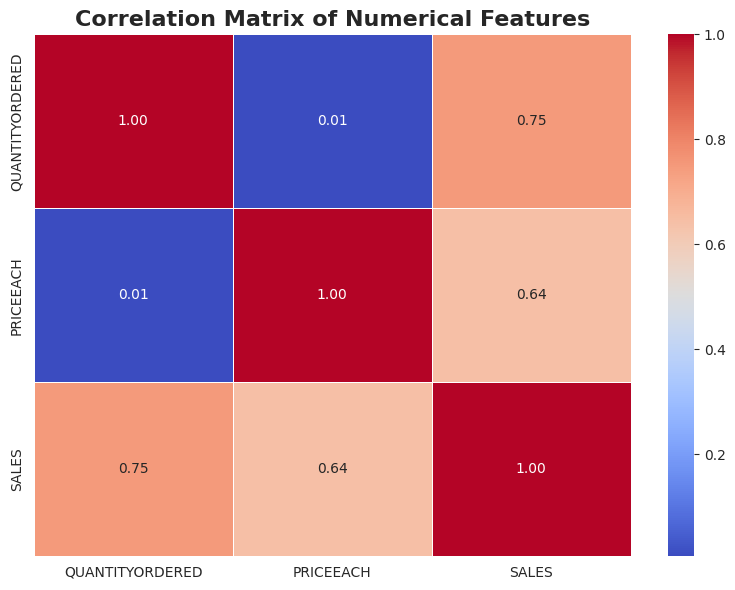

In [42]:
# Assuming 'sales' is your DataFrame
numerical_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']  # Choose relevant numerical columns
correlation_matrix = sales[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Korelasi Antar Fitur**
*    QUANTITYORDERED dan PRICEEACH:



Korelasi = 0.01

Interpretasi: Korelasi yang sangat rendah (mendekati 0) menunjukkan bahwa tidak ada hubungan linear yang signifikan antara jumlah barang yang dipesan (QUANTITYORDERED) dan harga per unit (PRICEEACH).

*   QUANTITYORDERED dan SALES:

Korelasi = 0.75

Interpretasi: Korelasi positif yang cukup kuat menunjukkan bahwa semakin banyak barang yang dipesan (QUANTITYORDERED), semakin tinggi total penjualan (SALES). Ini adalah hubungan yang diharapkan karena penjualan adalah hasil dari jumlah barang yang dipesan dikalikan harga per unit.

*   PRICEEACH dan SALES:

Korelasi = 0.64

Interpretasi: Korelasi positif yang cukup kuat menunjukkan bahwa semakin tinggi harga per unit (PRICEEACH), semakin tinggi total penjualan (SALES). Ini juga masuk akal karena harga yang lebih tinggi akan meningkatkan total penjualan jika jumlah barang yang dipesan tetap sama.

In [ ]:
# --- Define city_sales before plotting ---
city_sales = sales.groupby('CITY')['SALES'].sum().sort_values(ascending=False)

# Ambil 10 kota dengan penjualan tertinggi
top_10_cities = city_sales.head(10)
print(top_10_cities)

In [47]:
# Filter data untuk 10 kota dengan penjualan tertinggi
top_cities_data = sales[sales['CITY'].isin(top_10_cities.index)]

# Analisis distribusi produk di kota-kota tersebut
product_distribution = top_cities_data.groupby(['CITY', 'PRODUCTLINE'])['SALES'].sum().unstack()
print("Distribusi Produk di 10 Kota Teratas:")
print(product_distribution)

# Analisis segmentasi pelanggan
customer_segmentation = top_cities_data.groupby(['CITY', 'CUSTOMERNAME'])['SALES'].sum().unstack()
print("\nSegmentasi Pelanggan di 10 Kota Teratas:")
print(customer_segmentation)

Distribusi Produk di 10 Kota Teratas:
PRODUCTLINE    Classic Cars  Motorcycles    Planes     Ships    Trains  \
CITY                                                                     
Brickhaven         61115.25     15709.27  17718.98  12826.08       NaN   
Madrid            349361.91     53955.20  71984.32  90176.42  35479.12   
Melbourne          38241.45     42655.09  37357.03       NaN       NaN   
NYC               198768.80     79999.22   3789.72  37077.68  15560.96   
Nantes             30019.04     45622.05  44259.12  14320.94       NaN   
New Bedford        61567.47     18254.79  29533.16  28059.55   4925.23   
Paris              81885.81     72767.03       NaN       NaN   9226.01   
San Francisco      31600.79     50107.64       NaN   7155.12       NaN   
San Rafael        210396.20     24409.96       NaN  29764.84  20733.70   
Singapore          91791.76      4175.60       NaN  13065.74  12934.21   

PRODUCTLINE    Trucks and Buses  Vintage Cars  
CITY                     

1.  Data NaN: Nilai NaN menunjukkan bahwa pelanggan
tertentu tidak melakukan pembelian di kota tersebut. Misalnya, di kota Brickhaven, pelanggan Atelier graphique tidak melakukan pembelian, sehingga nilainya NaN.

2.  Pelanggan Utama: Beberapa pelanggan berkontribusi signifikan terhadap penjualan di kota tertentu. Misalnya:

*   Di Melbourne, Australian Collectors, Co. menghasilkan penjualan sebesar 164,575.87.

*  Di San Rafael, Mini Gifts Distributors Ltd. menghasilkan penjualan sebesar 530,587.19.

*  Distribusi Pelanggan: Beberapa kota memiliki beberapa pelanggan besar (misalnya, NYC dan San Rafael), sementara kota lain hanya memiliki satu atau dua pelanggan utama (misalnya, Brickhaven dan Singapore).

## Summary

*  Pembuatan Kolom Penjualan: Kolom 'SALES', yang penting untuk analisis, awalnya tidak ada dan harus dibuat dengan menghitung hasil kali 'QUANTITYORDERED' dan 'PRICEEACH'.

*  Distribusi Status Pesanan: Sebagian besar pesanan berstatus 'Shipped' (2618), diikuti oleh 'Cancelled' (60), 'Resolved' (47), 'On Hold' (44), 'In Process' (41), dan 'Disputed' (14). Distribusi ini dapat dianalisis lebih lanjut untuk memahami potensi hambatan atau area masalah dalam proses penjualan.

*  10 Kota Penjualan Tertinggi: Analisis mengidentifikasi 10 kota dengan penjualan tertinggi, yang dapat menyoroti pasar utama atau area potensial untuk pertumbuhan.

*  Korelasi Positif antara Kuantitas, Harga, dan Penjualan: Analisis korelasi menunjukkan korelasi positif antara 'QUANTITYORDERED', 'PRICEEACH', dan 'SALES', yang diharapkan. Namun, kekuatan korelasi ini dapat diselidiki lebih lanjut.